In [146]:
# imports
import random
import numpy as np
from scipy.fft import fft, fftfreq, fftshift
from scipy.signal import get_window
from math import factorial as factorial
from math import floor as floor
import matplotlib.pyplot as plt

In [147]:
# Bring an angle in radians into the range (0, 2pi)
# This just makes it easier to interpret the c parameter
def convert_angle(angle):
    return angle - 2 * np.pi * floor(angle / (2 * np.pi))

In [148]:
# Training data
def sine(a,b,c,x):
    return a * np.sin(2*np.pi*b * x + c)

dx = 0.001
x_data = np.arange(0,10,dx)
a_list = np.linspace(5,10,100)
b_list = np.linspace(0.1,3,100)
c_list = np.linspace(0,5,100)

# Choose one random sine function to work with
my_a = random.choice(a_list)
my_b = random.choice(b_list)
my_c = random.choice(c_list)

noise = np.random.normal(-my_a,my_a,len(x_data))
y_pure = sine(my_a, my_b, my_c, x_data)

y_data = y_pure + noise + my_a #keeps the signal centered on y=0

FFT freq:  0.2
b:  0.1292929292929293


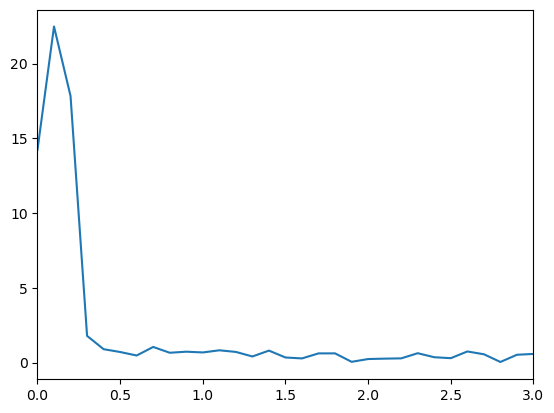

In [149]:
def fft(y):
    N = len(y)
    fs = int(1.0 / dx)
    window = get_window('hann', y.size)
    win_data = y * window
    freq = np.fft.rfftfreq(len(win_data))*fs
    freq_domain = np.fft.rfft(win_data)/fs
    return freq, abs(freq_domain)

freqs, amps = fft(y_data)
plt.plot(freqs, amps)
plt.xlim(0,3)

check_amps = []
check_freqs = []
for i in range(0,len(amps)):
    if freqs[i] > 0.1:
        check_amps.append(amps[i])
        check_freqs.append(freqs[i])

for i in range(0,len(check_amps)):
    if check_amps[i] == np.max(check_amps):
        freq = check_freqs[i]
print('FFT freq: ',freq)
print('phi: ',my_b)

In [150]:
# Regression
def train_lr(x_data, y_data, eta):
    a = 1  
    #b = freq    # Found from FFT
    c = 1

    for iter in range(0, MAX_ITERS): 
        dloss_da = 0
        #dloss_db = 0
        dloss_dc = 0
        loss = 0

        for i in range(0, len(x_data)): 
            x = x_data[i]
            ytrue = y_data[i]
            ypred = sine(a,freq,c,x)

            dmodel_da = np.sin(2*np.pi*freq*x+c)
            #dmodel_db = -2*np.pi*x*a*np.cos(2*np.pi*b*x+c)
            dmodel_dc = -a*np.cos(2*np.pi*freq*x+c)
            
            loss += (ytrue - ypred)**2  
            dloss_dypred = -2*(ytrue - ypred)
            #loss += np.exp(-ytrue*ypred)   
            #dloss_dypred = -ytrue*np.exp(-ytrue*ypred)
            #loss += np.log10(np.cosh(ypred - ytrue))
            #dloss_dypred = np.sinh(ypred - ytrue) / np.cosh(ypred - ytrue)
            #loss += (ypred - ytrue)**2 / ypred**2  
            #dloss_dypred = 2*(ypred - ytrue) / ypred**2 + (ypred - ytrue)**2 * (-2) / ypred**3

            dloss_da += dloss_dypred * dmodel_da
            #dloss_db += dloss_dypred * dmodel_db
            dloss_dc += dloss_dypred * dmodel_dc

        if np.sqrt(dloss_da**2 + dloss_dc**2) < 0.0001:
            print('Converged after '+str(iter+1)+' iterations.')
            break

        a = abs(a - eta*dloss_da)
        #b = b - eta*dloss_db
        c = convert_angle(c - eta*dloss_dc)
        print('a: ',a,'\nc: ',c)

    return (a, freq, c)

In [151]:
# Set hyperparameters
eta = 0.0001
MAX_ITERS = 300

In [152]:
# Run model
pred_a, pred_b, pred_c = train_lr(x_data, y_data, eta)
pred_data = sine(pred_a, pred_b, pred_c, x_data)
print('final a: ',pred_a,'| final f: ',pred_b,'| final phi: ',pred_c)
print('actual a: ',my_a,'| actual f: ',my_b,'| actual phi: ',my_c)

a:  2.566042675446997 
c:  2.3148613254707016
a:  1.9216262470224978 
c:  3.0820766872127594
a:  0.10883477271684305 
c:  3.8285801226479768
a:  2.036479078678599 
c:  3.6064348267968525
a:  1.5367307271299926 
c:  4.921323170351038
a:  2.7491837079702446 
c:  6.256974922673413
a:  0.2047183177836076 
c:  1.5973282149121815
a:  2.8612344646725787 
c:  1.5244379551140788
a:  2.879566684178855 
c:  1.1045959972837527
a:  2.6892974002600725 
c:  4.098673573560241
a:  2.5072643372701235 
c:  0.26978942405533246
a:  1.034741538485504 
c:  0.7342413950747968
a:  2.130621084875912 
c:  2.744382068147713
a:  0.8519064650021853 
c:  3.1586089920510982
a:  0.3288095517680434 
c:  0.7183289683243359
a:  2.0994403765886855 
c:  1.368157259750606
a:  2.867311969735644 
c:  2.0048015569573923
a:  2.4858710899278855 
c:  4.099472889447162
a:  2.5084015612912025 
c:  0.5651997754684679
a:  1.7734251978854467 
c:  6.267827924197586
a:  0.2359191633925075 
c:  5.080819135761924
a:  2.5762504362664953 
c

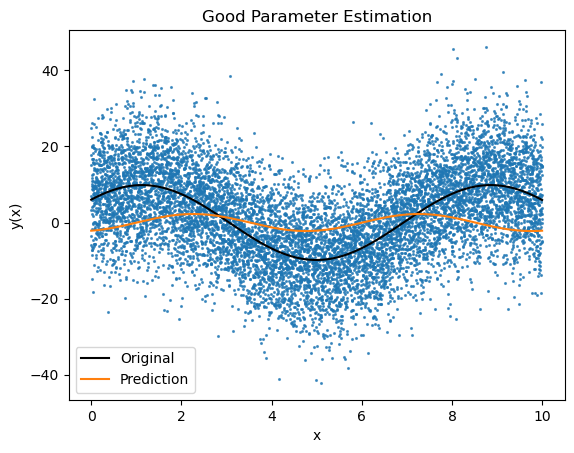

In [153]:
y_pred_data = sine(pred_a, pred_b, pred_c, x_data)
plt.plot(x_data, y_pure, label='Original', c='black')
plt.scatter(x_data, y_data, alpha=0.7, c='#1f77b4', s=1.5)
plt.plot(x_data, y_pred_data, label='Prediction', c='#ff7f0e')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Good Parameter Estimation')
plt.legend()